In [1]:
import pyodide_js
await pyodide_js.loadPackage('https://files.pythonhosted.org/packages/d2/e2/1fea483212fd78a1de8c010d1e784c0deb48e4799378c838509c3aa1e675/pylj-1.5.1-py3-none-any.whl')

import warnings
from pylj import md, sample
import numpy as np
import matplotlib.pyplot as plt
import time

warnings.filterwarnings('ignore')

In [2]:
def md_simulation(number_of_particles, temperature, box_length, number_of_steps, sample_frequency):
    # Initialise the system
    system = md.initialise(number_of_particles, temperature, box_length, 'square')
    # This sets the sampling class
    sample_system = sample.MaxBolt(system)# Start at time 0
    system.time = 0
    # Begin the molecular dynamics loop
    for i in range(0, number_of_steps):
        # Run the equations of motion integrator algorithm, this 
        # includes the force calculation
        system.integrate(md.velocity_verlet)
        # Sample the thermodynamic and structural parameters of the system
        system.md_sample()
        # Allow the system to interact with a heat bath
        system.heat_bath(temperature)
        # Iterate the time
        system.time += system.timestep_length
        system.step += 1
        # At a given frequency sample the positions and plot the RDF
        if system.step % sample_frequency == 0:
            sample_system.update(system)
    return system

The `md_simulation` function takes five variables:
- The number of particles
- The simulation temperature
- The simulation cell vector
- The number of steps
- The sampling frequency (how often the image is updated)

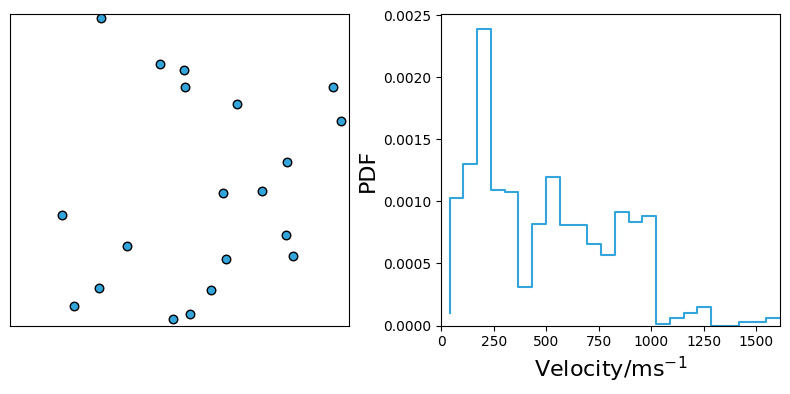

In [3]:
md_simulation(20, 1000, 100, 5000, 100)